In [1]:
import os
import sys
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
# Function to multiply matrices
def multiply_matrices(constant_matrix, num_matrices):
    start_time = time.time()
    for _ in range(num_matrices):
        result = np.dot(constant_matrix, np.random.rand(1000, 1000))
    end_time = time.time() - start_time
    return end_time

In [6]:
def main():
    # Define constant matrix
    constant_matrix = np.random.rand(1000, 1000)

    # Define number of matrices to multiply
    num_matrices = 100

    # Define number of threads
    num_threads = 8

    # Create threads to multiply matrices
    threads = []
    execution_times = []
    for i in range(num_threads):
        t = threading.Thread(target=multiply_matrices, args=(constant_matrix, num_matrices))
        threads.append(t)
        t.start()

    # Join threads and record execution times
    for t in threads:
        t.join()
        execution_time = multiply_matrices(constant_matrix, num_matrices)
        execution_times.append(execution_time)

    # Plot execution time vs number of active threads
    active_threads = range(1, num_threads + 1)

    plt.plot(active_threads, execution_times)
    plt.xlabel('Number of Active Threads')
    plt.ylabel('Execution Time (s)')
    plt.title('Execution Time vs Number of Active Threads')
    plt.grid(True)
    plt.show()

    # Create table
    table = PrettyTable()
    table.field_names = ["Number of Threads", "Time Taken (s)"]
    for i in range(num_threads):
        table.add_row([i + 1, execution_times[i]])

    print(table)

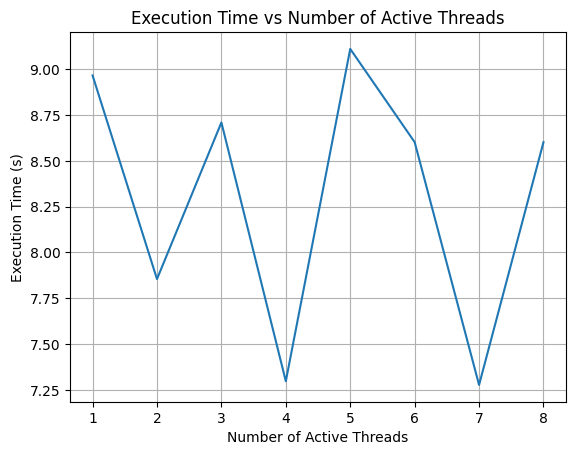

+-------------------+--------------------+
| Number of Threads |   Time Taken (s)   |
+-------------------+--------------------+
|         1         | 8.965466260910034  |
|         2         | 7.855114221572876  |
|         3         | 8.709080219268799  |
|         4         | 7.2979254722595215 |
|         5         |  9.11017394065857  |
|         6         |  8.60183835029602  |
|         7         | 7.277743816375732  |
|         8         | 8.601669788360596  |
+-------------------+--------------------+


In [8]:
main()